In [1]:
import numpy as np
import pandas as pd

News = pd.read_csv('abcnews-date-text.csv')
News.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [2]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1226258 non-null  int64 
 1   headline_text  1226258 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.7+ MB


In [3]:
News.isnull().sum()

publish_date     0
headline_text    0
dtype: int64

In [4]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.corpus import stopwords

C:\Users\MY\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def preprocess(text):
    result = []
    for i in simple_preprocess(text):
        if i not in STOPWORDS and len(i) > 2 and i not in stop_words:
            result.append(i)
            
    return result            

In [6]:
News['clean_headline'] = News['headline_text'].apply(preprocess)
News['clean_headline']

0           [aba, decides, community, broadcasting, licence]
1                        [act, witnesses, aware, defamation]
2                [calls, infrastructure, protection, summit]
3                      [air, staff, aust, strike, pay, rise]
4              [air, strike, affect, australian, travellers]
                                 ...                        
1226253               [abc, readers, learned, looking, year]
1226254                    [south, african, variants, covid]
1226255    [victorias, coronavirus, restrictions, mean, n...
1226256         [whats, life, like, american, doctor, covid]
1226257    [womens, shed, canberra, reskilling, unemploye...
Name: clean_headline, Length: 1226258, dtype: object

In [7]:
News['clean_headline_joined'] = News['clean_headline'].apply(lambda x: ' '.join(x))
News['clean_headline_joined']

0                 aba decides community broadcasting licence
1                             act witnesses aware defamation
2                     calls infrastructure protection summit
3                             air staff aust strike pay rise
4                    air strike affect australian travellers
                                 ...                        
1226253                     abc readers learned looking year
1226254                         south african variants covid
1226255    victorias coronavirus restrictions mean new ye...
1226256                whats life like american doctor covid
1226257    womens shed canberra reskilling unemployed pan...
Name: clean_headline_joined, Length: 1226258, dtype: object

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sid

sia = sid()

In [9]:
sia.polarity_scores(['clean_headline'][0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [11]:
News['scores'] = News['clean_headline_joined'].apply(lambda clean_headline_joined: sia.polarity_scores(clean_headline_joined))

In [12]:
News['compound'] = News['scores'].apply(lambda scores_dict: scores_dict['compound'])

In [13]:
News['sentiment'] = News['compound'].apply(lambda c: 'pos' if c > 0.25 else( 'neg' if c < -0.1 else 'nut'))

In [14]:
News_senti = News[['headline_text', 'scores', 'compound', 'sentiment']]

In [15]:
News_senti.head(40)

,headline_text,scores,compound,sentiment
0,aba decides against community broadcasting lic...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nut
1,act fire witnesses must be aware of defamation,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nut
2,a g calls for infrastructure protection summit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nut
3,air nz staff in aust strike for pay rise,"{'neg': 0.42, 'neu': 0.58, 'pos': 0.0, 'compou...",-0.2263,neg
4,air nz strike to affect australian travellers,"{'neg': 0.273, 'neu': 0.727, 'pos': 0.0, 'comp...",-0.1280,neg
5,ambitious olsson wins triple jump,"{'neg': 0.0, 'neu': 0.306, 'pos': 0.694, 'comp...",0.7783,pos
6,antic delighted with record breaking barca,"{'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'comp...",0.5106,pos
7,aussie qualifier stosur wastes four memphis match,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,nut
8,aust addresses un security council over iraq,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.3400,pos
9,australia is locked into war timetable opp,"{'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'comp...",-0.5994,neg


In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

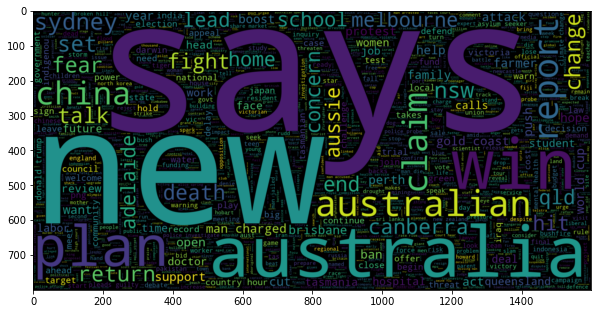

In [12]:
plt.figure(figsize = (10, 10))
wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(' '.join(News['clean_headline_joined']))
plt.imshow(wc, interpolation = 'bilinear')